In [ ]:
# Import modules
# Add modules as needed
from sklearn.datasets import fetch_openml
import numpy as np
from numpy import expand_dims
from sklearn.model_selection import train_test_split

# For windows laptops add following 2 lines:
import matplotlib
matplotlib.use('agg')

import matplotlib.pyplot as plt

from matplotlib.pyplot import imshow
%matplotlib inline

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
from tqdm import tqdm
import os
import random as rn
import cv2
from keras.losses import CategoricalCrossentropy, BinaryCrossentropy
from keras.utils.np_utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/DL_Project/PotholesPascalVOC.zip'

Archive:  /content/drive/MyDrive/DL_Project/PotholesPascalVOC.zip
   creating: images/
  inflating: images/potholes87.png   
   creating: __MACOSX/
   creating: __MACOSX/images/
  inflating: __MACOSX/images/._potholes87.png  
  inflating: images/potholes297.png  
  inflating: __MACOSX/images/._potholes297.png  
  inflating: images/potholes93.png   
  inflating: __MACOSX/images/._potholes93.png  
  inflating: images/potholes283.png  
  inflating: __MACOSX/images/._potholes283.png  
  inflating: images/potholes78.png   
  inflating: __MACOSX/images/._potholes78.png  
  inflating: images/potholes268.png  
  inflating: __MACOSX/images/._potholes268.png  
  inflating: images/potholes532.png  
  inflating: __MACOSX/images/._potholes532.png  
  inflating: images/potholes44.png   
  inflating: __MACOSX/images/._potholes44.png  
  inflating: images/potholes254.png  
  inflating: __MACOSX/images/._potholes254.png  
  inflating: images/potholes50.png   
  inflating: __MACOSX/images/._potholes50.p

In [ ]:
!unzip '/content/drive/MyDrive/DL_Project/Roadnopotholesimages.zip'

Archive:  /content/drive/MyDrive/DL_Project/Roadnopotholesimages.zip
   creating: Road no potholes images/
  inflating: Road no potholes images/image691.png  
  inflating: __MACOSX/Road no potholes images/._image691.png  
  inflating: Road no potholes images/image108.png  
  inflating: __MACOSX/Road no potholes images/._image108.png  
  inflating: Road no potholes images/image120.png  
  inflating: __MACOSX/Road no potholes images/._image120.png  
  inflating: Road no potholes images/image646.png  
  inflating: __MACOSX/Road no potholes images/._image646.png  
  inflating: Road no potholes images/image134.png  
  inflating: __MACOSX/Road no potholes images/._image134.png  
  inflating: Road no potholes images/image487.png  
  inflating: __MACOSX/Road no potholes images/._image487.png  
  inflating: Road no potholes images/image444.png  
  inflating: __MACOSX/Road no potholes images/._image444.png  
  inflating: Road no potholes images/image322.png  
  inflating: __MACOSX/Road no pothol

In [ ]:
def make_train_data(label,DIR):
    for img in tqdm(os.listdir(DIR)):
        try:
            path = os.path.join(DIR,img)
            img = cv2.imread(path,cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

            X.append(np.array(img))
            Z.append(str(label))
        except:
            pass
              
def assign_label(img,label):
    return label

In [ ]:
X=[]
Z=[]
IMG_SIZE=250

normal='../content/Road no potholes images/'
potholes='../content/images/'

make_train_data('NORMAL',normal)
make_train_data('POTHOLES',potholes)

100%|██████████| 665/665 [00:06<00:00, 96.04it/s] 


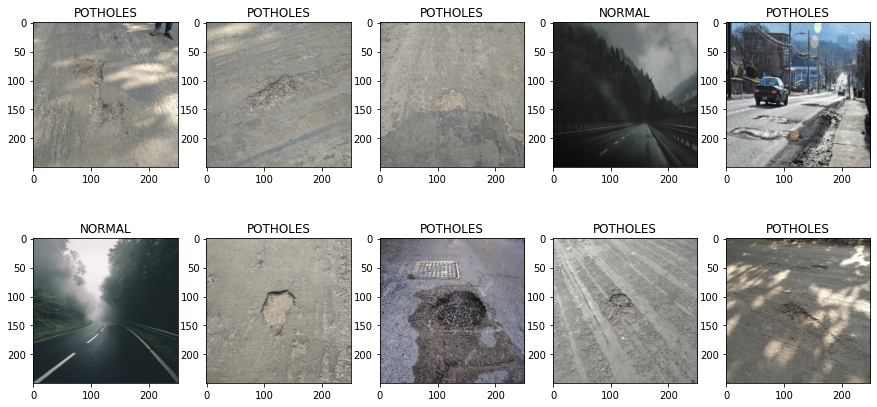

In [ ]:
fig,ax=plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(15,15)

for i in range(2):
    for j in range (5):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l][:,:,::-1])
        ax[i,j].set_title(Z[l])
        ax[i,j].set_aspect('equal')

# ax[1,1].imshow(X[789][:,:,::-1])
# ax[1,1].set_title(Z[789])

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,2)
print(Y)
X=np.array(X)
X=X/255

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state=42)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.15, random_state=42)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(1240, 250, 250, 3)
(895, 250, 250, 3)
(186, 250, 250, 3)
(159, 250, 250, 3)


In [ ]:
# Build Model

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (250, 250, 3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
       
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(2, activation = "sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 250, 250, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 125, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 125, 125, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 246016)            0

In [ ]:
# Compile model
#my_loss = BinaryCrossentropy(from_logits=True)

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
# Train model

history = model.fit(x=X_train, y=Y_train, batch_size=64, epochs=19, verbose=1, validation_data=(X_val, Y_val))


Epoch 1/19
14/14 [==============================] - 19s 176ms/step - loss: 1.7772 - accuracy: 0.4902 - val_loss: 0.5889 - val_accuracy: 0.7799
Epoch 2/19
14/14 [==============================] - 1s 84ms/step - loss: 0.5951 - accuracy: 0.6828 - val_loss: 0.5495 - val_accuracy: 0.7296
Epoch 3/19
14/14 [==============================] - 1s 82ms/step - loss: 0.4701 - accuracy: 0.8075 - val_loss: 0.5199 - val_accuracy: 0.7610
Epoch 4/19
14/14 [==============================] - 1s 83ms/step - loss: 0.4388 - accuracy: 0.8371 - val_loss: 0.5011 - val_accuracy: 0.7673
Epoch 5/19
14/14 [==============================] - 1s 83ms/step - loss: 0.3896 - accuracy: 0.8444 - val_loss: 0.5132 - val_accuracy: 0.7170
Epoch 6/19
14/14 [==============================] - 1s 83ms/step - loss: 0.3647 - accuracy: 0.8615 - val_loss: 0.5406 - val_accuracy: 0.7044
Epoch 7/19
14/14 [==============================] - 1s 83ms/step - loss: 0.3446 - accuracy: 0.8628 - val_loss: 0.6290 - val_accuracy: 0.6289
Epoch 8/19


In [ ]:
# evaluate model

test_loss, test_accuracy = model.evaluate(X_test, Y_test, batch_size=64)
print("Test Loss: {:.3f}, Test Accuracy: {:.3f}".format(test_loss, test_accuracy))


3/3 [==============================] - 0s 158ms/step - loss: 0.4674 - accuracy: 0.8065
Test Loss: 0.467, Test Accuracy: 0.806


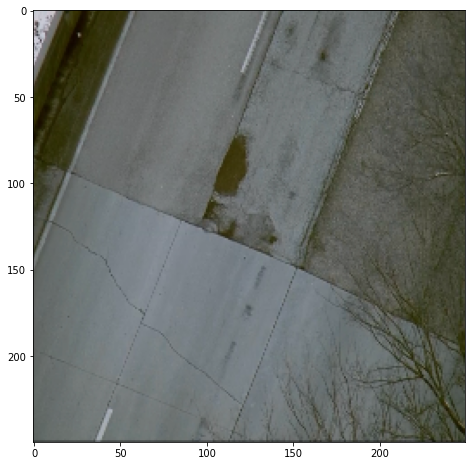

In [ ]:
# import random image

test_path = '../content/pothole-test2.jpg'

test_img = cv2.imread(test_path,cv2.IMREAD_COLOR)
test_img = cv2.resize(test_img, (IMG_SIZE,IMG_SIZE))

fig1,ay=plt.subplots(1,1)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig1.set_size_inches(15,15)

ay.imshow(test_img)

In [ ]:

test_img_dim = expand_dims(test_img, axis=0)

test_img_dim.shape

(1, 250, 250, 3)

In [ ]:
# predict class of random image

y_pred = model.predict(test_img_dim)

print(y_pred)

prediction = y_pred.argmax()

print(prediction)

p = le.inverse_transform([prediction])

print("This image is",str(p[0]))

[[0.00842974 0.9646966 ]]
1
This image is POTHOLES
